<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
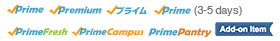
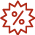

In [50]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

# user define function
# Scrape the data
def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text

def html_code(url):
    # pass the url
    # into getdata function
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')

    # display html code
    return soup

url = "https://www.amazon.in/Columbia-Mens-wind-resistant-Glove/dp/B0772WVHPS/?_encoding=UTF8&pd_rd_w=d9RS9&pf_rd_p=3d2ae0df-d986-4d1d-8c95-aa25d2ade606&pf_rd_r=7MP3ZDYBBV88PYJ7KEMJ&pd_rd_r=550bec4d-5268-41d5-87cb-8af40554a01e&pd_rd_wg=oy8v8&ref_=pd_gw_cr_cartx&th=1"

soup = html_code(url)
print(soup)


In [51]:
import nltk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

with open('D:\Data Science\Assignment\Assignment 11\stop.txt', 'r') as file:
    custom_stopwords = set(line.strip() for line in file)
    
with open('D:\Data Science\\Assignment\\Assignment 11\\negative-words.txt', 'r',encoding='latin-1') as file:
    negative_words = set(line.strip() for line in file)  
    
with open('D:\\Data Science\\Assignment\\Assignment 11\\positive-words.txt', 'r', encoding='latin-1') as file:
    positive_words = set(line.strip() for line in file)  
        
    
from nltk.stem import PorterStemmer
warnings.filterwarnings('ignore')

In [52]:
def cus_data(soup): 

    data_str = "" 
    cus_list = [] 
  
    for item in soup.find_all("span", class_="a-profile-name"): 
        data_str = data_str + item.get_text() 
        cus_list.append(data_str) 
        data_str = "" 
    return cus_list 
  
  
cus_res = cus_data(soup) 
print(cus_res) 

['Amazon Customer', 'Pavan H', 'Amaze', 'Amaze', 'D. Kong', 'Charl', 'Alexey', 'Robert', 'Guy']


In [53]:

def cus_rev(soup): 
    data_str = "" 
  
    for item in soup.find_all("div", class_="a-expander-content reviewText review-text-content a-expander-partial-collapse-content"): 
        data_str = data_str + item.get_text() 
  
    result = data_str.split("\n") 
    return result 
  
rev_data = cus_rev(soup) 
rev_result = [] 

for i in rev_data: 
    if i == "":
        pass
    else: 
        rev_result.append(i)

print(rev_result)


['I would not recommend this product for winters.', 'Good', 'This pair of gloves is not for very cold temperatures, but is of high quality build and should be able to handle most East Coast urban winter environments and outdoor activities.  If you need to use it for 20 F or lower temperatures with high wind chill factor, then you either need to use it with a pair of glove-sleeves/inner gloves or get a pair of heavier gloves. The stitching and seams are well executed.  The profile is slim and they do not feel bulky on my hands.  I can wear them with business and causal wears.  Index fingers on both gloves can operate smart phones and tablets.  Also, there is a micro fastex style buckle that can clip both gloves together. I highly recommend this pair of gloves.', "I normally wear size L and this size L fits very well. There is enough room on the palm and back of hands so that it doesn't restrict movement. It is comfortable when holding trekking poles or driving wheel without too much pre

In [54]:
import pandas as pd
cus_res = cus_res[:len(rev_result)]


data = {'Name': cus_res,
        'review': rev_result}

df = pd.DataFrame(data)

df.to_csv('amazon_review.csv')


In [55]:
data = pd.read_csv("amazon_review.csv")
data.head(11)

,Unnamed: 0,Name,review
0,0,Amazon Customer,I would not recommend this product for winters.
1,1,Pavan H,Good
2,2,Amaze,This pair of gloves is not for very cold tempe...
3,3,Amaze,I normally wear size L and this size L fits ve...
4,4,D. Kong,"They look good, and great quality. The touch s..."
5,5,Charl,I took the advice of all the reviews and order...
6,6,Alexey,"The gloves fit, but they are incredibly uncomf..."


In [56]:
data.rename(columns={'Unnamed: 0': 'Users'})

,Users,Name,review
0,0,Amazon Customer,I would not recommend this product for winters.
1,1,Pavan H,Good
2,2,Amaze,This pair of gloves is not for very cold tempe...
3,3,Amaze,I normally wear size L and this size L fits ve...
4,4,D. Kong,"They look good, and great quality. The touch s..."
5,5,Charl,I took the advice of all the reviews and order...
6,6,Alexey,"The gloves fit, but they are incredibly uncomf..."


In [57]:
from nltk.stem import PorterStemmer
import re

ps = PorterStemmer()

def preprocessing(x):
    x = re.sub('[^A-Za-z]', ' ', x)
    x = [ps.stem(word) for word in x.split()]
    x = " ".join(x)
    positive_words_count = sum(1 for word in x if word in positive_words)
    negative_words_count = sum(1 for word in x if word in negative_words)
    return x

data['review'] = data['review'].apply(preprocessing)
data.head(6)


,Unnamed: 0,Name,review
0,0,Amazon Customer,i would not recommend thi product for winter
1,1,Pavan H,good
2,2,Amaze,thi pair of glove is not for veri cold tempera...
3,3,Amaze,i normal wear size l and thi size l fit veri w...
4,4,D. Kong,they look good and great qualiti the touch scr...
5,5,Charl,i took the advic of all the review and order a...


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 

x = cv.fit_transform(data['review']).toarray()
x = pd.DataFrame(x, columns=cv.get_feature_names_out())

In [59]:
from textblob import TextBlob
data['sentiment_score'] = data['review'].apply(lambda text:TextBlob(text).sentiment.polarity)
data.head(7)

,Unnamed: 0,Name,review,sentiment_score
0,0,Amazon Customer,i would not recommend thi product for winter,0.000000
1,1,Pavan H,good,0.700000
2,2,Amaze,thi pair of glove is not for veri cold tempera...,0.062041
3,3,Amaze,i normal wear size l and thi size l fit veri w...,0.233333
4,4,D. Kong,they look good and great qualiti the touch scr...,0.135000
5,5,Charl,i took the advic of all the review and order a...,0.195000
6,6,Alexey,the glove fit but they are incred uncomfort i ...,0.046667


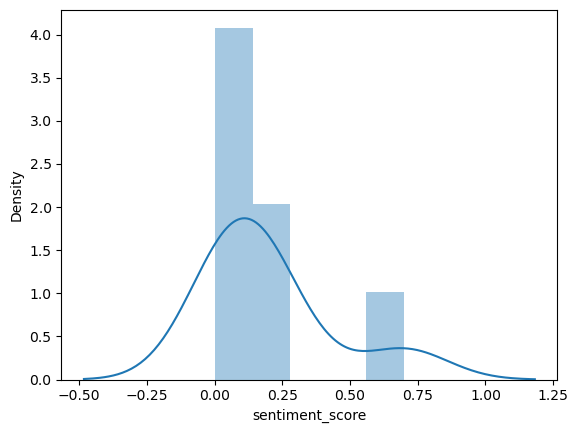

In [60]:
sns.distplot(data['sentiment_score'])
plt.show()

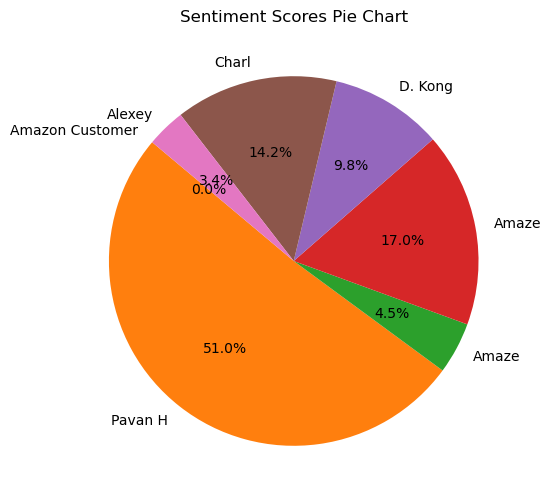

In [68]:
sentiment_scores = data['sentiment_score']

plt.figure(figsize=(6,6))
plt.pie(sentiment_scores,labels=data['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Scores Pie Chart')
plt.show()